# AI허브 건강관리를 위한 음식 이미지

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2, json, os
from tensorflow.keras.models import load_model as load_keras_model

## Comapre Metric

In [4]:
metrics = dict()
metrics['adam_accuracy'] = [0.0236, 0.0565, 0.1628, 0.2339, 0.2933, 0.4191, 0.4527, 0.4770, 0.5133, 0.5551]
metrics['adam_loss'] = [5.6666, 5.5205, 4.2405, 3.7667, 3.3760, 2.7278, 2.5538, 2.4203, 2.2561, 2.0630]
metrics['sgd_accuracy'] = [0.2377, 0.3230, 0.3936, 0.4158, 0.4316, 0.4417, 0.4529, 0.4602, 0.4671, 0.4752]
metrics['sgd_loss'] = [4.8911, 4.1012, 3.4290, 3.2602, 3.1393, 3.0506, 2.9819, 2.9265, 2.8823, 2.8390]

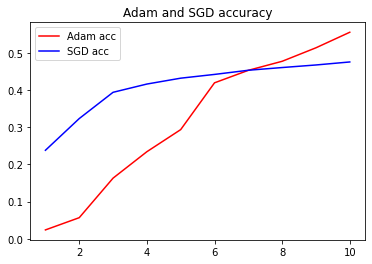

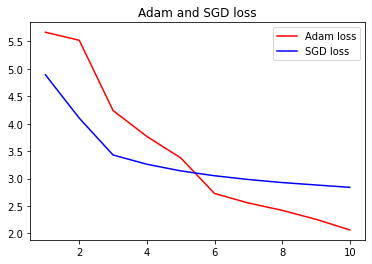

In [5]:
import matplotlib.pyplot as plt

acc = metrics['adam_accuracy']
val_acc = metrics['sgd_accuracy']

loss = metrics['adam_loss']
val_loss = metrics['sgd_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label="Adam acc")
plt.plot(epochs, val_acc, 'b', label="SGD acc")
plt.title('Adam and SGD accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label="Adam loss")
plt.plot(epochs, val_loss, 'b', label="SGD loss")
plt.title('Adam and SGD loss')
plt.legend()

plt.show()

## Compare Output

In [7]:
with open('label.json', 'r', encoding='UTF-8') as json_data:
    food_classes = json.load(json_data)
len(food_classes)

422

In [8]:
test_foods = ['가츠동','닭가슴살','미트볼','양배추샐러드','티라미수']
test_files = [cv2.imread(f'{food}.jpg') for food in test_foods]

### SGD

In [ ]:
sgd_preds = {'모델명':list()}
sgd_preds.update({food:list() for food in test_foods})

In [ ]:
for model_name in sorted(os.listdir('SGD')):
    if model_name in sgd_preds['모델명']:
        continue
    sgd_preds['모델명'].append(model_name)
    model = load_keras_model(os.path.join('SGD', model_name))

    for test_food, test_file in zip(test_foods, test_files):
        # food_image = cv2.resize(food_image, (299,299))
        test_file = np.expand_dims(test_file, axis=0)
        preds = model.predict(test_file)
        most_predict = np.argmax(preds)
        sgd_preds[test_food].append(food_classes[str(most_predict)])

In [ ]:
pd.DataFrame(sgd_preds)

,모델명,가츠동,닭가슴살,미트볼,양배추샐러드,티라미수
0,01-0.2337.hdf5,프레즐,프레즐,프레즐,낫또,프레즐
1,02-0.3230.hdf5,프레즐,프레즐,프레즐,까르보나라,프레즐
2,03-0.3689.hdf5,프레즐,프레즐,프레즐,까르보나라,프레즐
3,04-0.3936.hdf5,프레즐,프레즐,프레즐,프레즐,프레즐
4,05-0.4158.hdf5,프레즐,프레즐,프레즐,프레즐,프레즐
5,06-0.4316.hdf5,프레즐,프레즐,프레즐,양배추,프레즐
6,07-0.4417.hdf5,프레즐,프레즐,껌,양배추,프레즐
7,08-0.4529.hdf5,프레즐,프레즐,껌,양배추,프레즐
8,09-0.4602.hdf5,프레즐,프레즐,껌,양배추,프레즐
9,10-0.4671.hdf5,프레즐,프레즐,껌,양배추,프레즐


### Adam

In [21]:
adam_preds = {'모델명':list()}
adam_preds.update({food:list() for food in test_foods})

In [ ]:
for model_name in sorted(os.listdir('Adam')):
    if model_name in adam_preds['모델명']:
        continue
    adam_preds['모델명'].append(model_name)
    model = load_keras_model(os.path.join('Adam', model_name))

    for test_food, test_file in zip(test_foods, test_files):
        # food_image = cv2.resize(food_image, (299,299))
        test_file = np.expand_dims(test_file, axis=0)
        preds = model.predict(test_file)
        most_predict = np.argmax(preds)
        adam_preds[test_food].append(food_classes[str(most_predict)])

In [23]:
pd.DataFrame(adam_preds)

,모델명,가츠동,닭가슴살,미트볼,양배추샐러드,티라미수
0,01-0.0236.hdf5,천도복숭아,천도복숭아,천도복숭아,천도복숭아,천도복숭아
1,02-0.0565.hdf5,딸기,딸기,딸기,딸기,딸기
2,03-0.1628.hdf5,딸기,딸기,딸기,딸기,딸기
3,04-0.2339.hdf5,쨈빵,쨈빵,쨈빵,쨈빵,쨈빵
4,05-0.2933.hdf5,돼지감자,돼지감자,돼지감자,돼지감자,돼지감자
5,06-0.4191.hdf5,리조또,미역나물,미역나물,리조또,크림치즈
6,07-0.4527.hdf5,수프,수프,순대국밥,수프,수프
7,08-0.4770.hdf5,마테차,곶감,마테차,마테차,마테차
8,09-0.5133.hdf5,계란찜,계란찜,계란찜,계란찜,계란찜
9,10-0.5551.hdf5,닭갈비,닭갈비,닭갈비,닭갈비,닭갈비


In [25]:
best_model = load_keras_model(os.path.join('Adam', '37-0.7325.hdf5'))
best_model.save('inceptionv3.h5')